In [ ]:
import uproot
import vector
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np




We are using the
file named "ODEO_FEB2025_v0_exactly4lep_data15_periodD.exactly4lep"
from the
url "https://opendata.cern.ch/record/93924/files/"


Assigning Variables

In [ ]:
pt = tree["lep_pt"].array()
eta = tree["lep_eta"].array()
phi = tree["lep_phi"].array()
charge = tree["lep_charge"].array()


Making the 4-vector

In [ ]:
leps = vector.zip({
    "pt": pt,
    "eta": eta,
    "phi": phi,
    "mass": ak.zeros_like(pt)}) #assuming mass=0 for light leptons under ultra-relativistic limit

As this is a pre filtered file with 4 leptons exactly, we sum all them

In [ ]:
higgs_candidate = ak.sum(leps, axis=1)

masses = higgs_candidate.mass #".mass" calulates the invariable mass by solving the relativistic equation.
#Stats
print(f"Total events: {len(masses)}")
print(f"Minimum Mass: {np.min(masses):.2f} GeV")
print(f"Maximum Mass: {np.max(masses):.2f} GeV")

Checking no. of events around Higgs interval

In [ ]:
near_higgs = masses[(masses > 100) & (masses < 140)]
print(f"Events in Higgs window (100-140 GeV): {len(near_higgs)}")

Plot

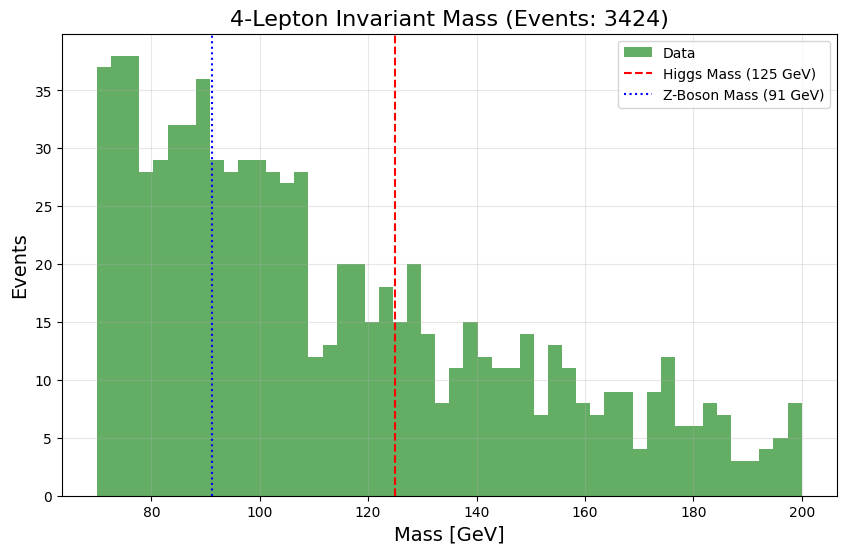

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(higgs_candidate.mass, bins=50, range=(70, 200), color='forestgreen', alpha=0.7, label='Data')
plt.axvline(125, color='red', linestyle='--', label='Higgs Mass (125 GeV)')
plt.axvline(91.2, color='blue', linestyle=':', label='Z-Boson Mass (91 GeV)')
plt.title(f'4-Lepton Invariant Mass (Events: {len(masses)})', fontsize=16)
plt.xlabel('Mass [GeV]', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

This graph shows the reconstructed mass of particle candidates found in our data. The X-axis is the calculated mass, and the Y-axis is the number of particles found. The accumulation of data points (green bars) around the red dashed line at 125 GeV is evidence of the Higgs boson, matching the theoretical predictions of the Standard Model.